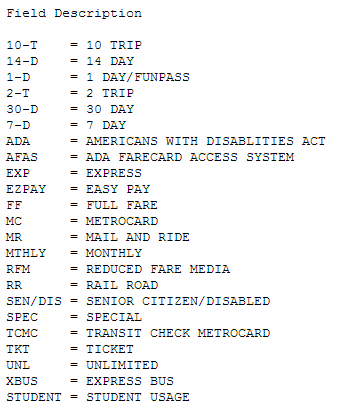

In [41]:
from IPython.display import Image
Image(filename = "Ridetype.png")

In [42]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

import os

import json
s = json.load( open(os.getenv ('PUI2015')+"/nk1877.json") )
pl.rcParams.update(s)

import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [43]:
##Importing Data
data=np.load("MTA_Fare.npy")

###Cleaning the Data

In [44]:
data=data.astype('float')
data[data==-1]=np.nan

In [45]:
rng = pd.date_range('05/21/2010', periods=194, freq='W')

In [46]:
rng

DatetimeIndex(['2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20', '2010-06-27', '2010-07-04', '2010-07-11',
               '2010-07-18', '2010-07-25', 
               ...
               '2013-12-01', '2013-12-08', '2013-12-15', '2013-12-22',
               '2013-12-29', '2014-01-05', '2014-01-12', '2014-01-19',
               '2014-01-26', '2014-02-02'],
              dtype='datetime64[ns]', length=194, freq='W-SUN', tz=None)

##Task1

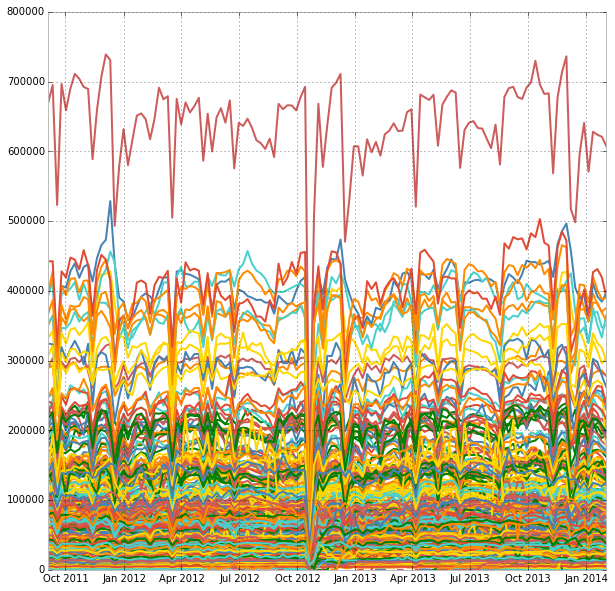

In [53]:
data1=np.transpose(data)
data1=np.sum(data1,axis=1)
fig1=figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
fig1.add_subplot(111)
data1.shape
plt.plot(rng,data1)

### Sharp steep is visible in all time series between september 2012 and Jan 2013 perhaps suggesting drop in usage of the MTA services due to hurricane Sandy

##TASK 2

In [23]:
time = pd.date_range('05/21/2010', periods=10, freq='W')

In [105]:
#
data2=np.nansum(data,axis=0)
data2=np.transpose(data2)
data2.shape


(194, 23)

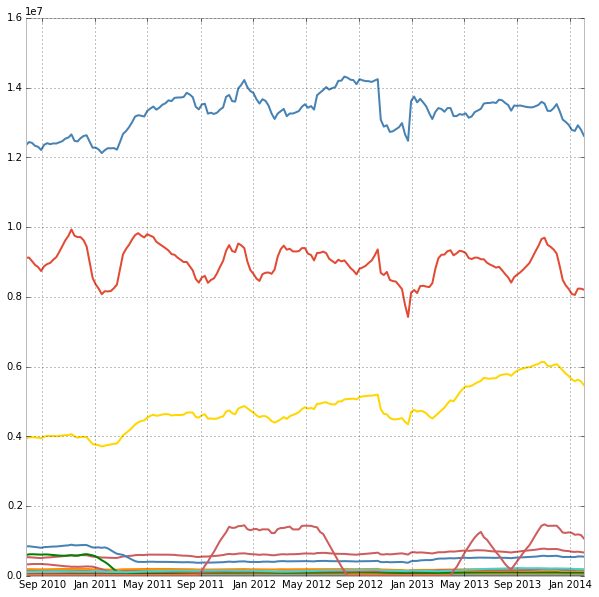

In [107]:
a= pd.rolling_mean(data2,10)
fig1=figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
fig1.add_subplot(111)
#print a
ax=plt.plot(rng,a)




[  9.85855761e-01   7.96898334e-01   9.01896857e-01   1.07217516e+00
   9.83155326e-01   7.26253084e-01   1.11214933e+00   4.80765217e+03
   9.42633429e+04   6.82381556e+05   1.23714609e+00   8.30622261e-01
   3.89558171e-05   1.74222625e+00   1.54426917e+00   3.87513943e-01
   3.47208425e-01   5.46373828e-02   6.53059649e-01   9.80984190e-01
   1.26020779e+00   6.18746842e-01   0.00000000e+00]
ERROR! Session/line number was not unique in database. History logging moved to new session 167


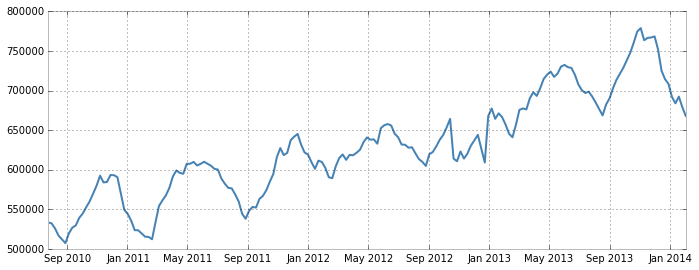

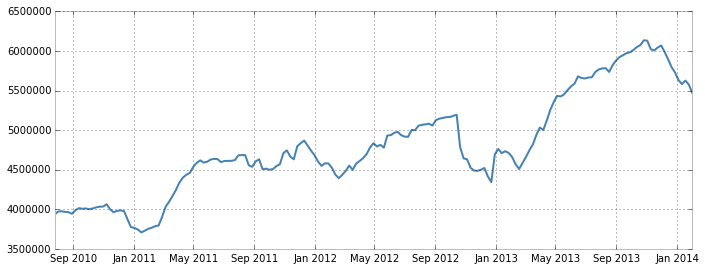

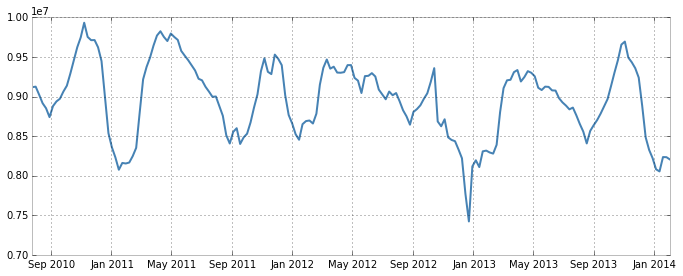

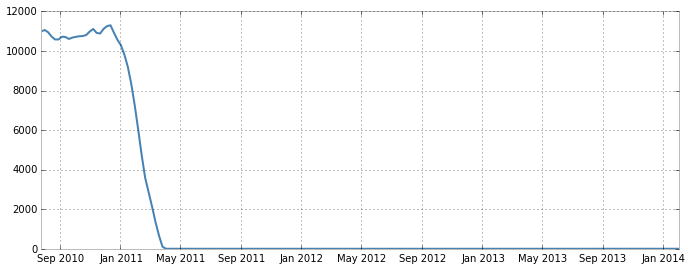

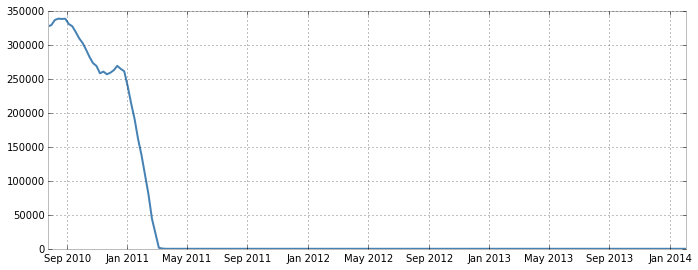

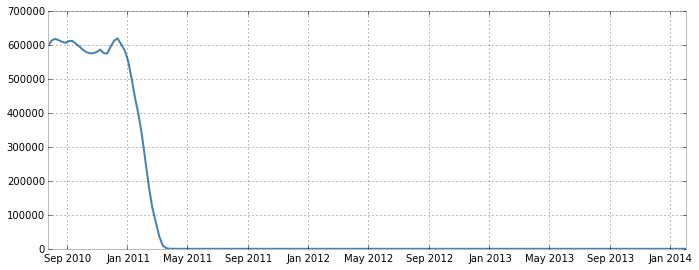

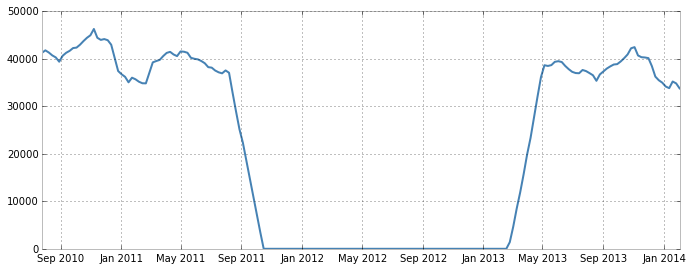

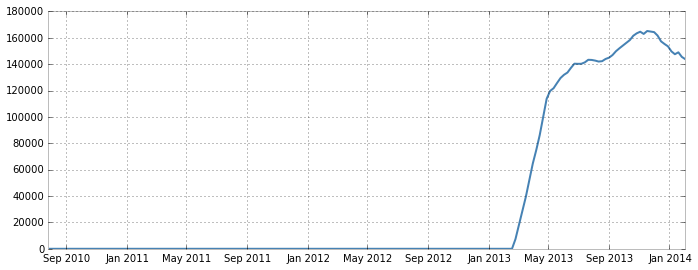

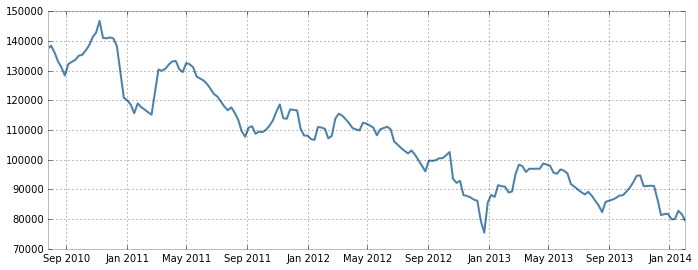

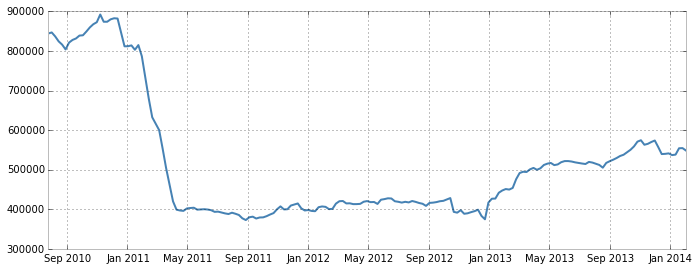

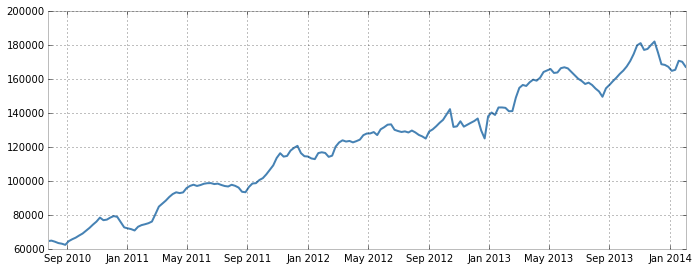

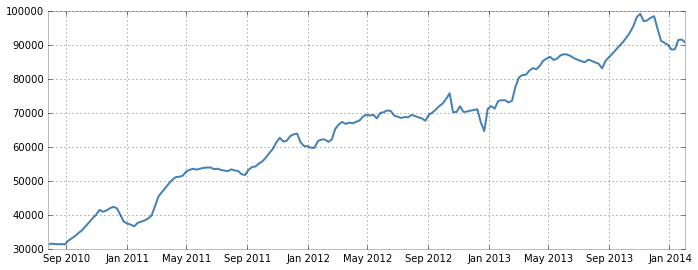

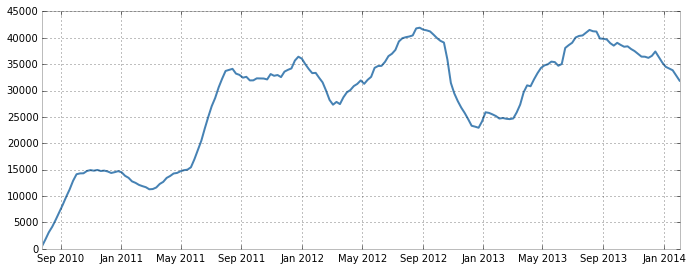

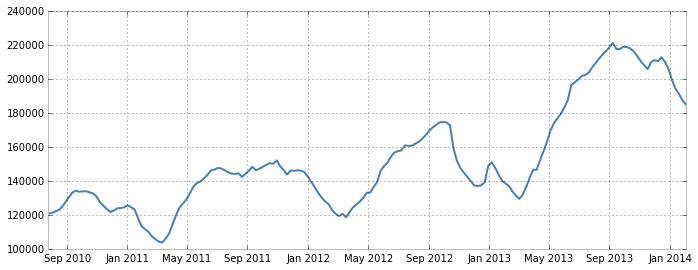

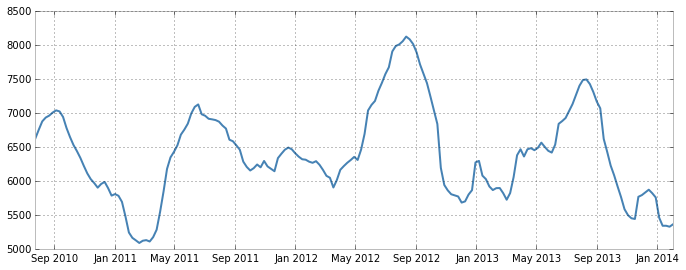

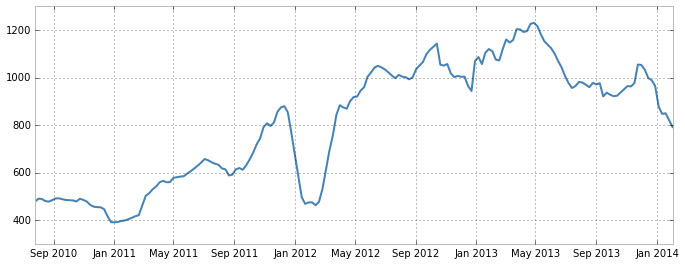

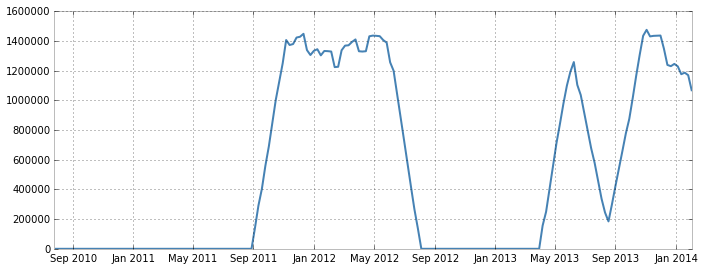

In [177]:
ratio= a[10,:]/a[193,:]
print ratio
j=0
for i in range(0,len(ratio)):
    if(ratio[i]>0.8 and ratio[i]<1.1):
            continue
    else:
        fig1=figure(num=None, figsize=(80, 40), dpi=100, facecolor='w', edgecolor='k')
        fig1.add_subplot(8,6,j)
        plt.plot(rng,a[:,i])
        j+=1

##Task 3

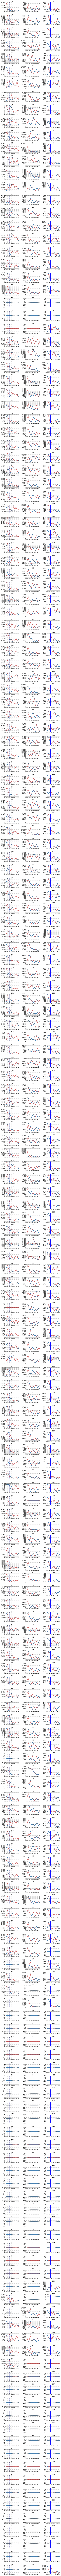

In [184]:
stns = np.nansum(data, axis=1)
f = np.abs(np.fft.rfft(stns))
f.shape

#Taking absolute real values of the fourier transform
ffreq = np.fft.rfftfreq(194, d=1.0)
ffreq.shape

fig = plt.figure(figsize=(10,400))
mtastats = pd.DataFrame(stns)


for i in range(600):
    ax = fig.add_subplot(200,3,i)
    b = np.abs(np.fft.rfft(mtastats.loc[i,:]))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (b)[1:], 'o', ms = 8)
    ax.set_title("%i" %(i-1))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
    ax.set_xlim(0,1.0/15)
    plt.axvline(1.0/52)
    pl.subplots_adjust(wspace=.5, hspace=.5, left=.125, right=.9, top=1, bottom=.1)
